## Binary classification problem

### Data

Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms

I transformed the classification problem into a binary classification problem by reducing the data to the labels 0 and 1.

The data can be downloaded here: https://github.com/zalandoresearch/fashion-mnist (https://arxiv.org/abs/1708.07747).

The images will be stored at **./data/fashion_mnist_images_binary**. This directory must have a folder called train, containing folders for each class (named with the class index), the images will be in these class folders. In addition, the directory must have a folder called test, with the same structure of the train folder.

In [ ]:
%cd ..

import os
import urllib.request
from zipfile import ZipFile
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from utils.load_images import create_image_data
from src.model.neural_network import NeuralNetwork
from src.utils.plots import plot_epochs_history

np.set_printoptions(linewidth=200)

### Load the data

In [2]:
# # If you downloaded a zipped file:

# url = ''
# file = './data/fashion_mnist_images.zip'
folder = './data/fashion_mnist_images_binary'

# if not os.path.isfile(file):
#     print(f'Downloading from {url} and saving as {file}')
# urllib.request.urlretrieve(url, file)

# print('Unzipping images')
# with ZipFile(file) as zip_images:
#     zip_images.extractall(folder)

In [3]:
labels = os.listdir(f'{folder}/train')
print(labels)

['0', '1']


In [4]:
image_data = cv2.imread(f'{folder}/train/1/0007.png', cv2.IMREAD_UNCHANGED)
print(image_data)

[[  0   0   0   0   0   0   0   0   0   0 175 119 114  86  89  99 109 132   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  92 255 254 255 255 255 255 250 255  19   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 211 234 210 219 220 215 210 206 255 119   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 231 224 226 225 223 222 215 237 204   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  50 255 221 228 227 227 224 224 222 221 251   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 135 255 221 229 229 228 226 228 226 218 255  78   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 180 245 222 227 228 228 227 225 224 220 252 106   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 204 232 221 224 225 226 226 224 224 217 247 124   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 208 233 222 226 225 231 231 226 225 221 244 13

In [5]:
label_description = {
    0: 'T-shirt/top',
    1: 'Trouser'
    }

### Split data

In [6]:
X, y, X_test, y_test = create_image_data(folder)

In [7]:
y = y.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [8]:
# shuffle the training dataset
keys = np.array(range(X.shape[0]))
np.random.shuffle(keys)
X = X[keys]
y = y[keys]

# scale and reshape samples
X = (X.reshape(X.shape[0], -1).astype(np.float32) - 127.5) / 127.5
X_test = (X_test.reshape(X_test.shape[0], -1).astype(np.float32) - 127.5) / 127.5

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify = y, test_size=0.3, random_state=42)

### Fit the model

In [ ]:
input_shape = X_train.shape[1]
output_n_neurons = y_train.shape[1]
start_params = dict(input_shape = input_shape, output_n_neurons = output_n_neurons, output_activation='sigmoid', accuracy= 'categorical')

model = NeuralNetwork(**start_params)

# add layers
params = dict(loss = 'binary_cross_entropy', optimizer = 'adam', 
        epochs = 20, batch_size = 128,        
        n_layers = 5, n_neurons = 100, learning_rate = 0.0005,
        decay = 5e-5)

model.set_params(**params)

model.fit(X_train, y_train, validation_data=(X_val, y_val), print_every_n_steps=300)

### Plot accumulated epoch losses and validation losses

The validation loss (in **orange**) usually starts smaller than the epoch losses because the values used to calculate the epoch loss are computed before the parameter update and the validation loss is computed after all parameter updates of the epoch.

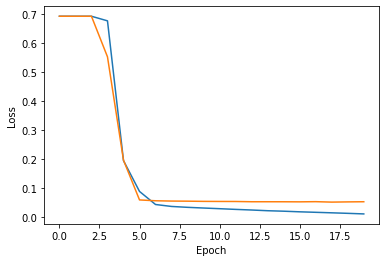

In [10]:
plot_epochs_history([model.accumulated_epoch_losses, model.validation_epoch_losses], 'Loss')

### Predictions

In [11]:
model.predict(X, type='proba')

array([[2.77307965e-05],
       [1.02445725e-02],
       [2.85343413e-04],
       ...,
       [9.99993430e-01],
       [2.38654614e-03],
       [9.99982166e-01]])

In [12]:
model.predict(X, type='classes')

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

### Save the model

In [13]:
model.save_model('binary_fashion_mnist.model')

### Load and evaluate

In [14]:
model = NeuralNetwork.load('binary_fashion_mnist.model')

model.evaluate(X_test, y_test)

0-> Acc: 0.985 Loss: 0.056


(0.05554909543760571, 0.985)